# JSON Project - World Bank Data

## Importing modules

In [2]:
# Importing the pandas and json packages
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
from pandas.io.json import to_json

In [3]:
# load as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')
df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
approvalfy,500.0,2.013108e+03,7.220656e-01,1999.0,2013.0,2013.0,2013.0,2.015000e+03
grantamt,500.0,4.432400e+06,2.023307e+07,0.0,0.0,0.0,1695000.0,3.650000e+08
ibrdcommamt,500.0,3.286010e+07,1.089197e+08,0.0,0.0,0.0,0.0,1.307800e+09
idacommamt,500.0,3.542136e+07,7.681431e+07,0.0,0.0,0.0,37000000.0,6.000000e+08
lendprojectcost,500.0,1.547241e+08,4.764211e+08,30000.0,6472500.0,35000000.0,102125000.0,5.170000e+09
totalamt,500.0,6.828146e+07,1.242662e+08,0.0,0.0,20000000.0,86250000.0,1.307800e+09
totalcommamt,500.0,7.271386e+07,1.234705e+08,30000.0,5000000.0,25000000.0,90450000.0,1.307800e+09


## 1. Find the 10 countries with most projects

In [4]:
df = df.loc[:,['countryname','project_name', 'projectstatusdisplay']]
df.head(5)


,countryname,project_name,projectstatusdisplay
0,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...,Active
1,Republic of Tunisia,TN: DTF Social Protection Reforms Support,Active
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,Active
3,Republic of Yemen,Gov't and Civil Society Organization Partnership,Active
4,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...,Active


In [22]:
# There is no missing value in countryname and project name columns
df[['countryname', 'project_name']].isnull().sum()       

countryname     0
project_name    0
dtype: int64

In [32]:
# 500 projects were shared among 118 countries
df[['countryname', 'project_name']].nunique()     

countryname     118
project_name    500
dtype: int64

In [14]:
# Determine the top 10 countries with most project (1)
country_df = df.groupby('countryname')['project_name'].count().sort_values(ascending = False).head(10)
country_df

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

#### We may reach the same conclusion with a different codes as shown below.

In [67]:
# Determine the top 10 countries with most project (2)
country_df = df.groupby("countryname")["project_name"].count().nlargest(10)
country_df

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

In [70]:
# Determine the top 10 countries with most project (3)
country_df = df.groupby('countryname', as_index=False)['countryname'].agg({'number_of_projects':np.size})
country_df.sort_values('number_of_projects', ascending=False).head(10)

,countryname,number_of_projects
39,People's Republic of China,19
64,Republic of Indonesia,19
107,Socialist Republic of Vietnam,17
63,Republic of India,16
97,Republic of Yemen,13
38,People's Republic of Bangladesh,12
34,Nepal,12
25,Kingdom of Morocco,12
76,Republic of Mozambique,11
0,Africa,11


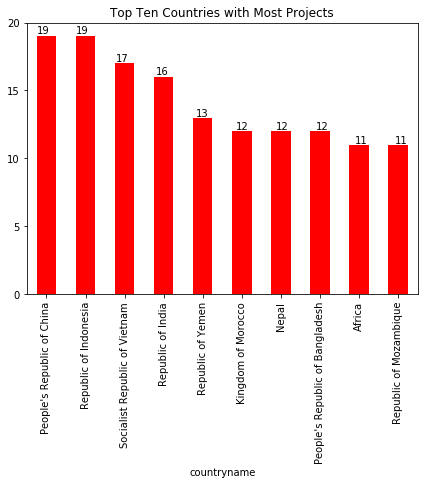

In [28]:
# Bar plot of top 10 countries
ax = country_df.plot(kind = 'bar', color = 'r', yticks = (0,5,10,15,20), title='Top Ten Countries with Most Projects', 
                     figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))
plt.show()

# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [47]:
# First load json as string and then normalize project themes dictionary.
data_str = json.load(open('data/world_bank_projects.json'))
themes = json_normalize(data_str, 'mjtheme_namecode')
themes.name.replace('', 'Missing_Values', inplace=True)
themes = themes.rename(columns={'name':'project_theme'})

In [49]:
# This gives the top 10 major project themes with null values. 
themes_withnull = themes.groupby('project_theme').size().sort_values(ascending=False).head(10)
themes_withnull

project_theme
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Missing_Values                                  122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64

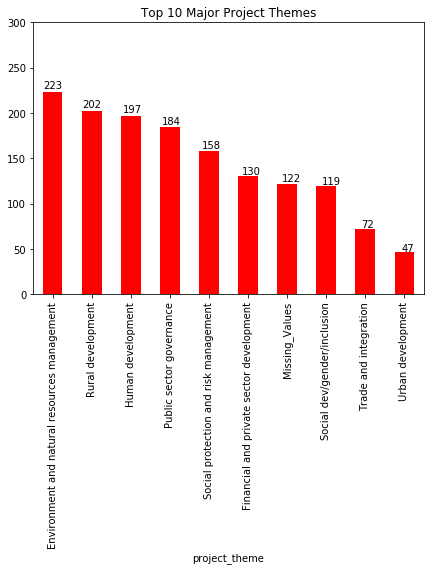

In [50]:
# Bar plot of top 10 major project themes
ax = themes_withnull.plot(kind='bar', color = 'red', yticks = (0,50,100,150,200,250,300), title = 'Top 10 Major Project Themes', figsize = (7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
plt.show()

# 3. Create a dataframe with the missing names filled in.

In [91]:
fill_df = themes.sort_values('code')
fill_df['project_theme'] = fill_df.project_theme.replace('Missing_Values', method = "pad")
fill_df = fill_df.groupby('project_theme', as_index = False)['project_theme'].agg({'total_number': np.size})
themes_withoutnull = fill_df.sort_values(by='total_number', ascending=False)

In [92]:
# This shows the top 10 after filling the missing values.
themes_withoutnull.head(10)

,project_theme,total_number
1,Environment and natural resources management,250
6,Rural development,216
3,Human development,210
4,Public sector governance,199
8,Social protection and risk management,168
2,Financial and private sector development,146
7,Social dev/gender/inclusion,130
9,Trade and integration,77
10,Urban development,50
0,Economic management,38


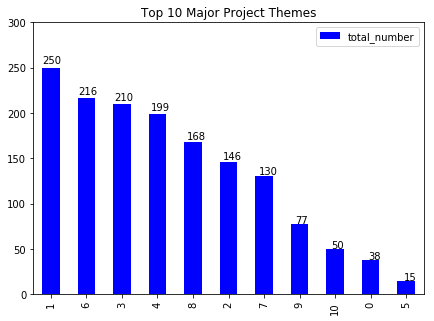

In [93]:
# Visualize the result in the bar graph via matplotlib library.
ax = themes_withoutnull.plot(kind='bar', color = 'blue', yticks = (0,50,100,150,200,250,300), title = 'Top 10 Major Project Themes', figsize = (7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
plt.show()

**Conclusion:**  

* I observed that the top 10 themes didn't change so much when compared the data without missing "name" values filled in given their respective code.


* Even that is the case, I still saw the number of instances showed differences. For instance, the top the theme "Environment and Natural Resources Management" rised from 223 to 250 while "Urban Development" rised from 47 to 50. After filling the missing values, "Economic Management" theme, which was not previously uncovered, showed up on the top 10. 

### Out of curiosity: Is there a simple automated method for comparing the values before replacement and after to identify what have been removed/added from the Top 10 list?

In [34]:
s1 = set(themes_withnull.index)

In [35]:
s2 = set(themes_withoutnull.project_theme)

In [37]:
s1.intersection(s2)

{'Environment and natural resources management',
 'Financial and private sector development',
 'Human development',
 'Public sector governance',
 'Rural development',
 'Social dev/gender/inclusion',
 'Social protection and risk management',
 'Trade and integration',
 'Urban development'}

In [39]:
s2 - s1

{'Economic management'}

In [45]:
s1 -s2

{''}